https://finance.yahoo.com/calendar/earnings/?day=2024-01-01


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for SGH:
Average IV for Calls: 0.6808128668038504
Average IV for Puts: 0.8252388514099122
Total Call Volume: 673.0
Total Call open interest: 8623
Total Call engagement: 9296.0
Total Put Volume: 244.0
Total Put open interest: 2579
Total Put engagement: 2823.0
Number of ITM Call Options: 17
Number of ITM Put Options: 21


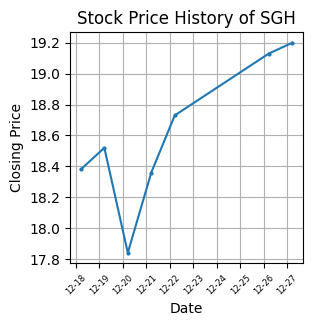

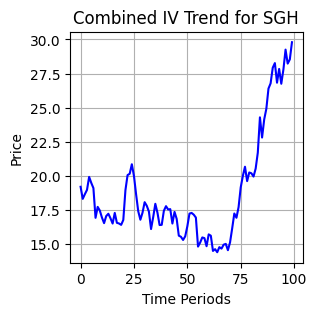

Data fetched for SGH, entries: 229


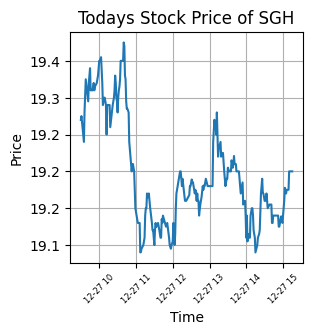

Options data for SRAX:
Average IV for Calls: 0.100001
Average IV for Puts: 1.0000000000000003e-05
Total Call Volume: 5.0
Total Call open interest: 356
Total Call engagement: 361.0
Total Put Volume: 4
Total Put open interest: 37
Total Put engagement: 41
Number of ITM Call Options: 0
Number of ITM Put Options: 1


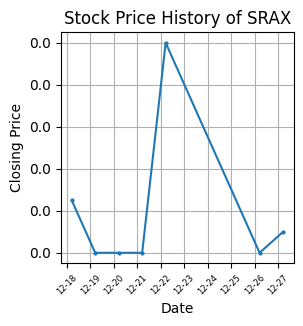

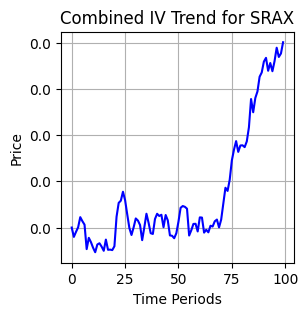

Data fetched for SRAX, entries: 5


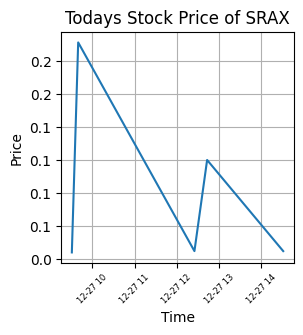

In [2]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2024-01-01'

# Set the time frame
date = datetime.strptime(day, '%Y-%m-%d')
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=14)

# Check if start_date is earlier than today, if not change start_date to today - 7 days
current_date = datetime.now()
start_date = current_date - timedelta(days=14) if start_date >= current_date else start_date

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if pd.isna(options_metrics['avg_put_implied_volatility']):
        continue
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted